# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [75]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [105]:
# Here, I renamed the data with more intuitive names as was done in the tutorial

df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1, inplace=True)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **GRADE 4 MATH** 

How many years of data are logged in our dataset? 

In [77]:

df['YEAR'].unique()


array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 1986, 1987, 1988, 1989, 1990, 1991, 2017, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [78]:

print('Michigan score:', df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean())
print('Ohio score:', df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean())


Michigan score: 234.36363636363637
Ohio score: 239.45454545454547


Find the average for your outcome score across all states in 2019

In [36]:
df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [56]:
# Create an array of all of the states
states = df['STATE'].unique()

for st in states:
    print(st, ':', df[df['STATE'] == st]['AVG_MATH_4_SCORE'].max())



ALABAMA : 233.0
ARIZONA : 240.0
ARKANSAS : 240.0
CALIFORNIA : 235.0
COLORADO : 247.0
CONNECTICUT : 245.0
DELAWARE : 243.0
DISTRICT_OF_COLUMBIA : 235.0
FLORIDA : 246.0
GEORGIA : 240.0
HAWAII : 243.0
IDAHO : 242.0
INDIANA : 249.0
IOWA : 246.0
KENTUCKY : 242.0
LOUISIANA : 234.0
MAINE : 246.0
MARYLAND : 247.0
MASSACHUSETTS : 253.0
MICHIGAN : 238.0
MINNESOTA : 253.0
MISSISSIPPI : 241.0
MISSOURI : 241.0
NEBRASKA : 246.0
NEW_HAMPSHIRE : 253.0
NEW_JERSEY : 249.0
NEW_MEXICO : 233.0
NEW_YORK : 243.0
NORTH_CAROLINA : 245.0
NORTH_DAKOTA : 246.0
OHIO : 246.0
OKLAHOMA : 240.0
PENNSYLVANIA : 246.0
RHODE_ISLAND : 242.0
SOUTH_CAROLINA : 238.0
TENNESSEE : 241.0
TEXAS : 244.0
UTAH : 244.0
VIRGINIA : 248.0
WEST_VIRGINIA : 237.0
WISCONSIN : 245.0
WYOMING : 248.0
ILLINOIS : 239.0
KANSAS : 248.0
MONTANA : 244.0
NEVADA : 237.0
OREGON : 240.0
VERMONT : 248.0
ALASKA : 237.0
SOUTH_DAKOTA : 242.0
WASHINGTON : 246.0
NATIONAL : 242.0
DODEA : 250.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [108]:
# Perform adjustments to total enrollment that were done in the tutorial
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

# Add instruction expenditure per student
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL_EST']

Feature engineering justification: I decided to add one feature: instruction expenditure per student. The instruction expenditure per student is a measure of how much instruction attention a student is getting, as we can compare how much is spent on instruction per the number of students enrolled (we will use total enrollment numbers, since it seems that the total instruction expenditure is for all students.)

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

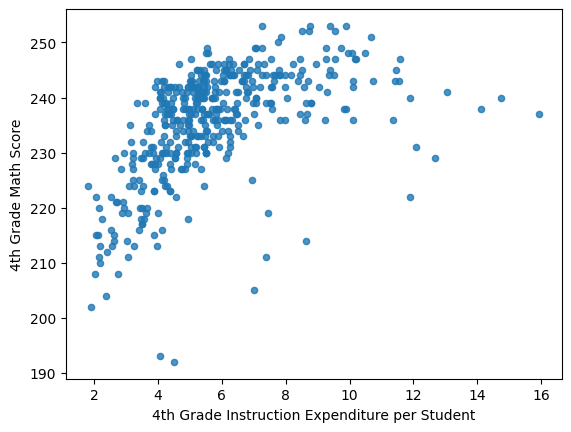

In [119]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y = 'AVG_MATH_4_SCORE', alpha=0.8)
plt.xlabel('4th Grade Instruction Expenditure per Student')
plt.ylabel('4th Grade Math Score')

The expenditure per student has a fairly strong correlation of a student's general math ability up to a certain point. When the expenditure per student is around 7 on the x-axis, the increase in their math score seems to level off, and so the data suggests that spending more money on instruction will only be effective up to a certain point, i.e. it is not a sure conclusion that the more money you spend on a student, the more their performance will increase.

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

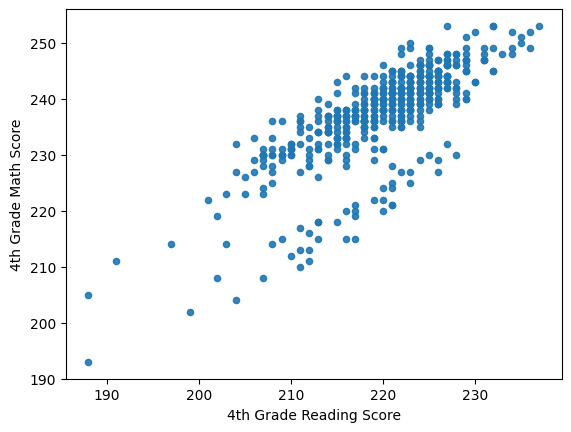

In [131]:
df.plot.scatter(x='AVG_READING_4_SCORE',y='AVG_MATH_4_SCORE', alpha=0.9)
plt.xlabel('4th Grade Reading Score')
plt.ylabel('4th Grade Math Score')

This was one of the few other variables for which there was any sort of correlation. Similarly to how we saw in the tutorial, the average reading score of a 4th grader was a very strong indicator of their math score. There does seem to be two groups for which it is an indicator, as one group scores on average 20 points lower than the other group, but in both group the reading score is still a fairly good indicator of the math score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [132]:
from sklearn.model_selection import train_test_split

In [174]:
# Train on data only in Michigan, using the two indicators from above
#df_Mich = df[df['STATE'] == 'MICHIGAN'][['AVG_READING_4_SCORE', 'INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
# There is not nearly enough data from the state of Michigan, so I will
# just train on all data after the year 2000

df_y2k = df[df['YEAR'] > 2000][['AVG_READING_4_SCORE', 'INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()

X = df_y2k
y = df.loc[df_y2k.index]['AVG_MATH_4_SCORE']

# Not missing AVG_MATH_4_SCORE, already handled that

In [192]:
# Just as we did in the tutorial, we will set random_state to 0 to
# ensure the same result every time we run the code. There is not a lot
# of data, so to ensure a large enough testing group we will use 
# a 60 / 40 split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
# create your model here
model = LinearRegression()

In [189]:
model.fit(X_train, y_train)

LinearRegression()

In [190]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [196]:
# The R^2 value suggests that the given predicts the data fairly well
print(model.score(X_test, y_test))

# The mean error is also small
print(np.mean(model.predict(X_test)-y_test))

0.77047946844115
0.28555025108963966


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

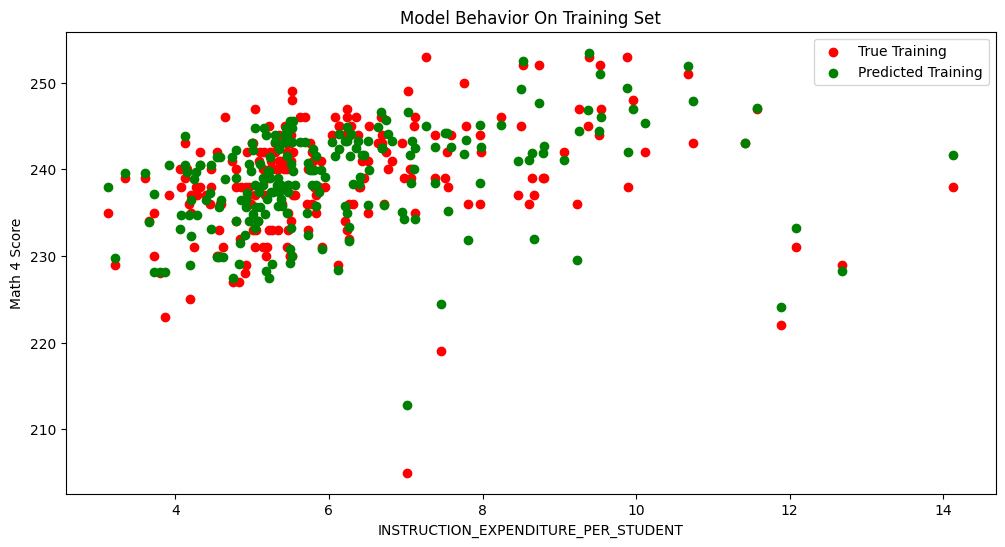

In [194]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

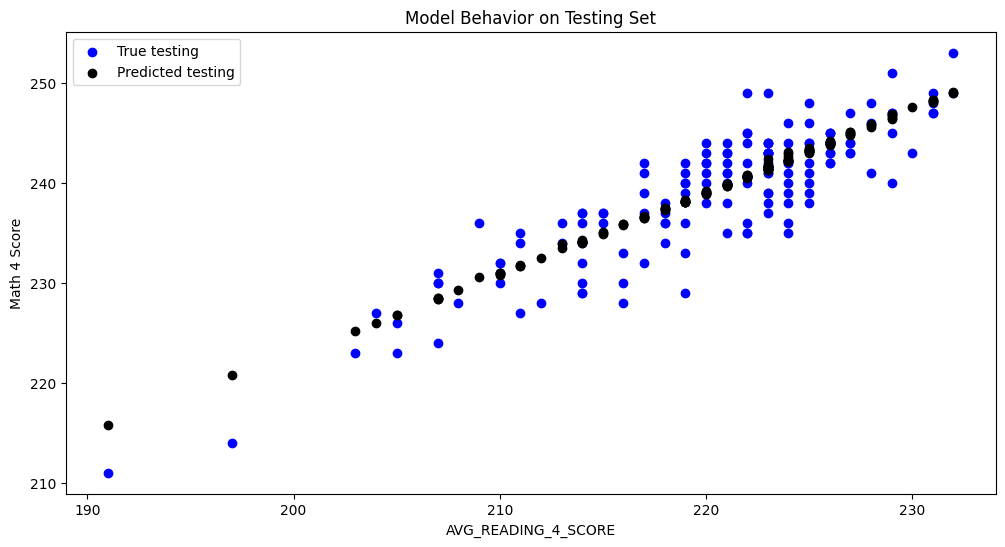

In [185]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Originally, I went with the suggestion to train the model only on data in Michigan, but the data in Michigan was extremely limited, and so I think what happened was that there was tremendous overfitting, so the model was performing poorly on the testing data. I adjusted to instead train on data after the year 2000, which ended up working much better since there was much more data available. I did not have a ton of data, since I restricted the data to years and states where they actually recorded scores for 4th grade reading, so I decided to yield a higher percentage of the data to testing than the tutorial did, and it ended up working well. The model tested much better on the average reading score of a 4th grader than it did on the instruction expenditure per student, and this makes sense since in general, the data for the reading score was far more correlated than the data for the instruction expenditure per student, as at a certain point, the expenditure figure ceases to be a good indicator for the math score. 